# Neural network 6 emotions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, callbacks, activations, regularizers
import numpy as np

2023-06-13 22:43:17.294228: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
def plot_results(hist):
  fig, axs = plt.subplots(1, 2, figsize=(25, 8))
  axs[0].plot(hist.history['loss'], label='loss')
  axs[0].plot(hist.history['val_loss'], label='val_loss')
  axs[1].plot(hist.history['accuracy'], label='accuracy')
  axs[1].plot(hist.history['val_accuracy'], label='val_accuracy')

  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Loss')
  axs[0].legend()
  axs[0].grid(True)

  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Accuracy')
  axs[1].legend()
  axs[1].grid(True)

Load and scale data
Change labels to numerical values
Remove highly correlated features
Create train, validation and test splits

In [4]:
# loading the data
dataset = pd.read_csv('../dataset/labeled_6_combined_dataset.csv', index_col=0)

# getting unique labels
unique_labels = np.unique(dataset['LABEL'])
unique_labels

array(['Ekscytacja', 'Neutralna', 'Odprezenie', 'Radosc', 'Smutek',
       'Zlosc'], dtype=object)

In [5]:
# changing labels to numerical
dataset.loc[dataset['LABEL'] == 'Ekscytacja', 'LABEL'] = 0.0
dataset.loc[dataset['LABEL'] == 'Neutralna', 'LABEL'] = 1.0
dataset.loc[dataset['LABEL'] == 'Odprezenie', 'LABEL'] = 2.0
dataset.loc[dataset['LABEL'] == 'Radosc', 'LABEL'] = 3.0
dataset.loc[dataset['LABEL'] == 'Smutek', 'LABEL'] = 4.0
dataset.loc[dataset['LABEL'] == 'Zlosc', 'LABEL'] = 5.0

In [6]:
# separating data and labels
data = dataset.iloc[:, :-4]
labels = dataset.iloc[:, -1]
labels = np.asarray(labels).astype('float32')

# scaling the data
data_scaled = StandardScaler().fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# removing correlated features
corr = data.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
data.drop(to_drop, axis=1, inplace=True)

# creating train, validation and test splits
d, data_test, l, labels_test = train_test_split(data_scaled, labels, test_size=0.1, random_state=0, stratify=labels)
data_train, data_validation, labels_train, labels_validation = train_test_split(d, l, test_size=0.1, random_state=0, stratify=l)

In [7]:
BaseDense = partial(
    layers.Dense,
    kernel_initializer="he_normal",
    kernel_regularizer=tf.keras.regularizers.l2(0.001),
)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=96, restore_best_weights=True)
reduce_lr_cb = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=32)

# ECG

Extract only ecg related features

In [8]:
ecg_columns = [col for col in data.columns if 'ECG' in col or 'HRV' in col]

ecg_data_train = data_train[ecg_columns]
ecg_data_validation = data_validation[ecg_columns]
ecg_data_test = data_test[ecg_columns]

Define the model and train it

2023-06-13 22:43:38.444129: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-13 22:43:39.476787: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1


Epoch 1/1000


2023-06-13 22:43:41.314663: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f07f0019a60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-13 22:43:41.314695: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2023-06-13 22:43:41.432155: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


134/134 [==============================] - 3s 10ms/step - loss: 3.1911 - accuracy: 0.2353 - val_loss: 2.7673 - val_accuracy: 0.2408 - lr: 0.1000
Epoch 2/1000
134/134 [==============================] - 1s 7ms/step - loss: 2.5366 - accuracy: 0.2447 - val_loss: 2.3424 - val_accuracy: 0.2419 - lr: 0.1000
Epoch 3/1000
134/134 [==============================] - 1s 7ms/step - loss: 2.2080 - accuracy: 0.2549 - val_loss: 2.0977 - val_accuracy: 0.2429 - lr: 0.1000
Epoch 4/1000
134/134 [==============================] - 1s 6ms/step - loss: 2.0170 - accuracy: 0.2517 - val_loss: 1.9579 - val_accuracy: 0.2524 - lr: 0.1000
Epoch 5/1000
134/134 [==============================] - 1s 7ms/step - loss: 1.9071 - accuracy: 0.2566 - val_loss: 1.8754 - val_accuracy: 0.2482 - lr: 0.1000
Epoch 6/1000
134/134 [==============================] - 1s 6ms/step - loss: 1.8426 - accuracy: 0.2598 - val_loss: 1.8218 - val_accuracy: 0.2734 - lr: 0.1000
Epoch 7/1000
134/134 [==============================] - 1s 7ms/step - 

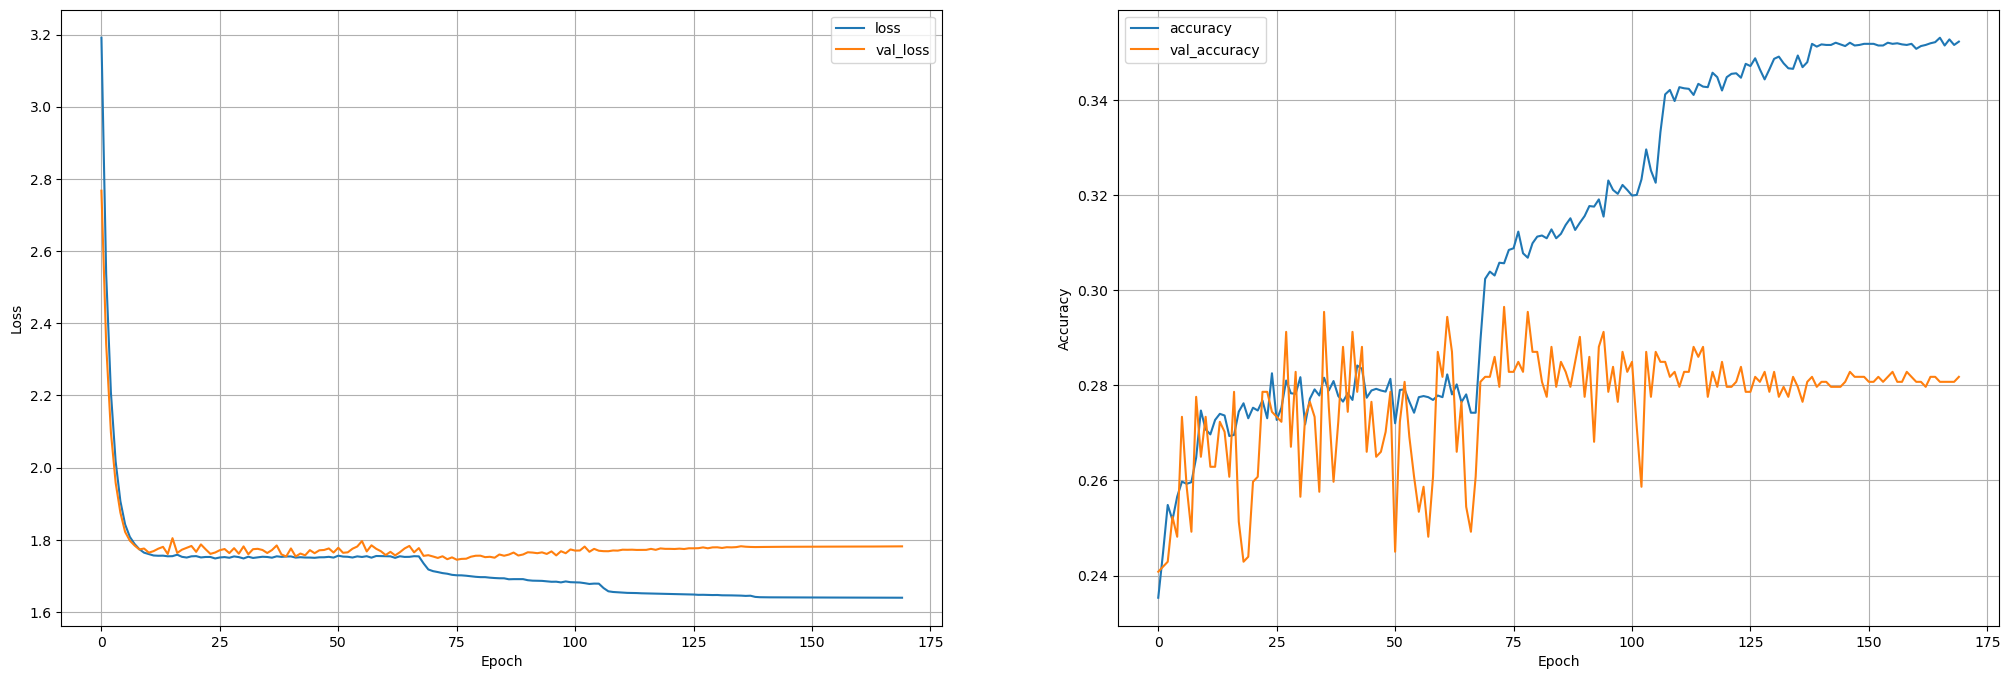

In [9]:
ecg_model = tf.keras.Sequential([
    BaseDense(256),
    layers.ReLU(),
    BaseDense(256),
    layers.ReLU(),
    BaseDense(256),
    layers.ReLU(),
    layers.Dense(6, activation='softmax')
])

ecg_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

h = ecg_model.fit(
    ecg_data_train,
    labels_train,
    epochs=1000,
    batch_size=64,
    validation_data=(ecg_data_validation, labels_validation),
    callbacks=[early_stop, reduce_lr_cb]
)

plot_results(h)

In [10]:
ecg_predictions = np.argmax(ecg_model.predict(ecg_data_test), axis=1)

ecg_cr = classification_report(labels_test, ecg_predictions, target_names=unique_labels, zero_division=0, digits=4, output_dict=True)
print(classification_report(labels_test, ecg_predictions, target_names=unique_labels, zero_division=0, digits=4))

34/34 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

  Ekscytacja     0.1429    0.0165    0.0296       121
   Neutralna     0.3300    0.6471    0.4371       255
  Odprezenie     0.2258    0.0473    0.0782       148
      Radosc     0.1857    0.0760    0.1079       171
      Smutek     0.2000    0.0336    0.0575       149
       Zlosc     0.2758    0.5399    0.3651       213

    accuracy                         0.2904      1057
   macro avg     0.2267    0.2267    0.1792      1057
weighted avg     0.2414    0.2904    0.2189      1057



# EDA

Extract only eda related features

In [11]:
eda_columns = [col for col in data.columns if 'EDA' in col or 'SCR' in col]

eda_data_train = data_train[eda_columns]
eda_data_validation = data_validation[eda_columns]
eda_data_test = data_test[eda_columns]

Define the model and train it

Epoch 1/1000
134/134 [==============================] - 2s 6ms/step - loss: 3.0527 - accuracy: 0.2291 - val_loss: 2.6907 - val_accuracy: 0.2419 - lr: 0.1000
Epoch 2/1000
134/134 [==============================] - 1s 4ms/step - loss: 2.4761 - accuracy: 0.2374 - val_loss: 2.2899 - val_accuracy: 0.2429 - lr: 0.1000
Epoch 3/1000
134/134 [==============================] - 1s 4ms/step - loss: 2.1684 - accuracy: 0.2429 - val_loss: 2.0593 - val_accuracy: 0.2566 - lr: 0.1000
Epoch 4/1000
134/134 [==============================] - 1s 5ms/step - loss: 1.9928 - accuracy: 0.2469 - val_loss: 1.9301 - val_accuracy: 0.2334 - lr: 0.1000
Epoch 5/1000
134/134 [==============================] - 1s 4ms/step - loss: 1.8897 - accuracy: 0.2522 - val_loss: 1.8530 - val_accuracy: 0.2534 - lr: 0.1000
Epoch 6/1000
134/134 [==============================] - 1s 5ms/step - loss: 1.8320 - accuracy: 0.2474 - val_loss: 1.8078 - val_accuracy: 0.2450 - lr: 0.1000
Epoch 7/1000
134/134 [==============================] - 1s

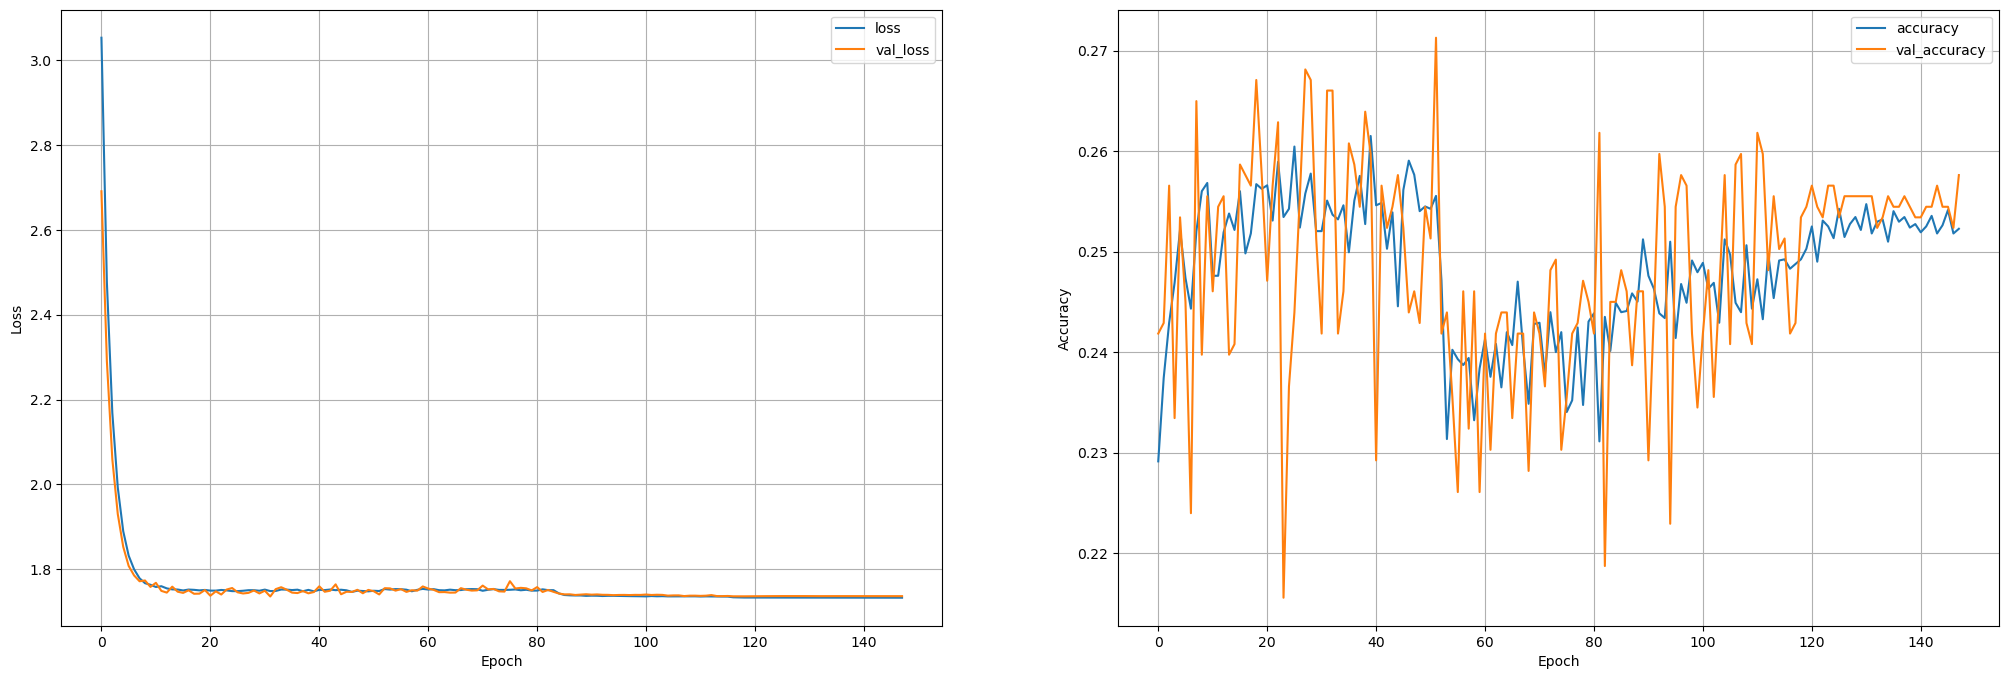

In [12]:
eda_model = tf.keras.Sequential([
    BaseDense(256),
    layers.ReLU(),
    BaseDense(256),
    layers.ReLU(),
    BaseDense(256),
    layers.ReLU(),
    layers.Dense(6, activation='softmax')
])

eda_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

h = eda_model.fit(
    eda_data_train,
    labels_train,
    epochs=1000,
    batch_size=64,
    validation_data=(eda_data_validation, labels_validation),
    callbacks=[early_stop, reduce_lr_cb]
)

plot_results(h)

In [13]:
eda_predictions = np.argmax(eda_model.predict(eda_data_test), axis=1)

eda_cr = classification_report(labels_test, eda_predictions, target_names=unique_labels, zero_division=0, digits=4, output_dict=True)
print(classification_report(labels_test, eda_predictions, target_names=unique_labels, zero_division=0, digits=4))

34/34 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

  Ekscytacja     0.0000    0.0000    0.0000       121
   Neutralna     0.3058    0.4784    0.3731       255
  Odprezenie     0.4545    0.0338    0.0629       148
      Radosc     0.1667    0.0234    0.0410       171
      Smutek     0.0000    0.0000    0.0000       149
       Zlosc     0.2520    0.7371    0.3756       213

    accuracy                         0.2725      1057
   macro avg     0.1965    0.2121    0.1421      1057
weighted avg     0.2152    0.2725    0.1811      1057



# Combined

Epoch 1/1000
134/134 [==============================] - 2s 7ms/step - loss: 3.0764 - accuracy: 0.2337 - val_loss: 2.7083 - val_accuracy: 0.2345 - lr: 0.1000
Epoch 2/1000
134/134 [==============================] - 1s 5ms/step - loss: 2.4827 - accuracy: 0.2511 - val_loss: 2.3250 - val_accuracy: 0.2397 - lr: 0.1000
Epoch 3/1000
134/134 [==============================] - 1s 5ms/step - loss: 2.1711 - accuracy: 0.2623 - val_loss: 2.0735 - val_accuracy: 0.2482 - lr: 0.1000
Epoch 4/1000
134/134 [==============================] - 1s 6ms/step - loss: 1.9881 - accuracy: 0.2764 - val_loss: 1.9425 - val_accuracy: 0.2618 - lr: 0.1000
Epoch 5/1000
134/134 [==============================] - 1s 5ms/step - loss: 1.8859 - accuracy: 0.2800 - val_loss: 1.8596 - val_accuracy: 0.2850 - lr: 0.1000
Epoch 6/1000
134/134 [==============================] - 1s 6ms/step - loss: 1.8247 - accuracy: 0.2783 - val_loss: 1.8176 - val_accuracy: 0.2534 - lr: 0.1000
Epoch 7/1000
134/134 [==============================] - 1s

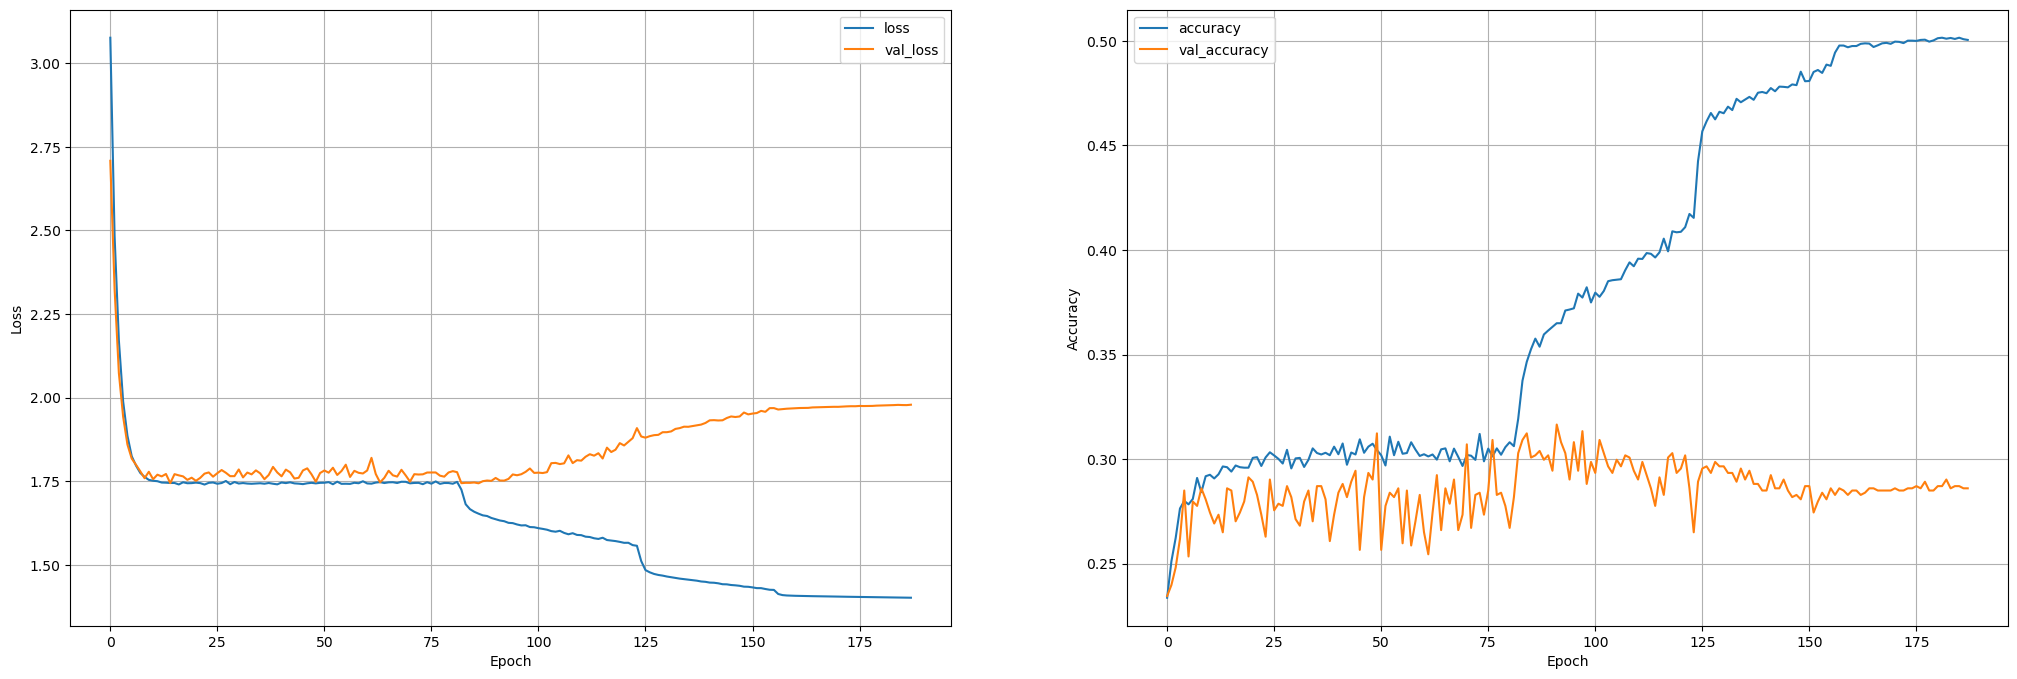

In [14]:
model = tf.keras.Sequential([
    BaseDense(256),
    layers.ReLU(),
    BaseDense(256),
    layers.ReLU(),
    BaseDense(256),
    layers.ReLU(),
    layers.Dense(6, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

h = model.fit(
    data_train,
    labels_train,
    epochs=1000,
    batch_size=64,
    validation_data=(data_validation, labels_validation),
    callbacks=[early_stop, reduce_lr_cb]
)

plot_results(h)

In [15]:
predictions = np.argmax(model.predict(data_test), axis=1)

cr = classification_report(labels_test, predictions, target_names=unique_labels, zero_division=0, digits=4, output_dict=True)
print(classification_report(labels_test, predictions, target_names=unique_labels, zero_division=0, digits=4))

34/34 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

  Ekscytacja     0.2059    0.1157    0.1481       121
   Neutralna     0.3686    0.5059    0.4264       255
  Odprezenie     0.2632    0.1351    0.1786       148
      Radosc     0.2078    0.0936    0.1290       171
      Smutek     0.1652    0.1275    0.1439       149
       Zlosc     0.2776    0.4836    0.3527       213

    accuracy                         0.2848      1057
   macro avg     0.2480    0.2436    0.2298      1057
weighted avg     0.2622    0.2848    0.2571      1057



# Summary

In [16]:
print(f'''
\tAccuracy:
ECG:\t{ecg_cr['accuracy']}
EDA:\t{eda_cr['accuracy']}
Both:\t{cr['accuracy']}
\tAverage F1:
ECG:\t{ecg_cr['macro avg']['f1-score']}
EDA:\t{eda_cr['macro avg']['f1-score']}
Both:\t{cr['macro avg']['f1-score']}
\tWeighted F1:
ECG:\t{ecg_cr['weighted avg']['f1-score']}
EDA:\t{eda_cr['weighted avg']['f1-score']}
Both:\t{cr['weighted avg']['f1-score']}
''')


	Accuracy:
ECG:	0.2904446546830653
EDA:	0.27246925260170296
Both:	0.2847682119205298
	Average F1:
ECG:	0.1792270766203703
EDA:	0.14210091565438995
Both:	0.22981287262376993
	Weighted F1:
ECG:	0.21891278500924793
EDA:	0.18113866389726604
Both:	0.2570892587296381

